In [1]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline

import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
import numpy as np
from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot
import seaborn as sns
from sklearn import cluster, metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
import glob           # to read multiple files
import pylab as pl

/Users/nikospatias/anaconda/envs/paper1/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/Users/nikospatias/anaconda/envs/paper1/lib/python3.7/site-packages/pysal/contrib/viz/mapping.py:32: UserWarning: Bokeh not installed. Functionality related to it will not work
  warn('Bokeh not installed. Functionality '


In [101]:
# Specify directory
data_dir = '/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/'

Vector_grid = gpd.read_file(data_dir + 'layers/Vector_grid/2011_contain.shp')

In [102]:
# Read in the region-grid correspondence table
Region = pd.read_csv('/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/GridWardLANation.csv', encoding = "ISO-8859-1")

In [103]:
# Important for the merge to work as the grid_ID it is an integer
Region['grid_ID'] = Region['grid_ID'].astype('str')

In [104]:
Vector_grid = pd.merge(Vector_grid, Region,  how='left', left_on=['GRIDCODE'], right_on = ['grid_ID'])
Vector_grid = Vector_grid.rename(columns={'grid_ID': 'ID_2',\
                               'RegionNation': 'Region',\
                               'East_x': 'East',\
                               'North_x': 'North'})

In [105]:
directory_1971 = '/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/1971/'

df1 = pd.read_csv('/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/1971/lookup_1971_Age_X0_14.csv')
df1.columns = ['grid_ID', 'Age0_14']

for index, file in enumerate(glob.glob(directory_1971 +'/*.csv')):
   
    if 'Age_Age0_14' in file:
        continue        
   
    k = file.split('/')[-1]
    df = pd.read_csv(file)
    df.columns = ['grid_ID', k]
    df1 = df1.merge(df, on='grid_ID')

In [106]:
directory_1981 = '/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/1981/'

df2 = pd.read_csv('/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/1981/lookup_1981_Age_X0_14.csv')
df2.columns = ['grid_ID', 'Age0_14']

for index, file in enumerate(glob.glob(directory_1981 +'/*.csv')):

    if 'Age_Age0_14' in file:
        continue   
   
    k = file.split('/')[-1]
    df = pd.read_csv(file)
    df.columns = ['grid_ID', k]
    df2 = df2.merge(df, on='grid_ID')

In [107]:
directory_1991 = '/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/1991/'

df3 = pd.read_csv('/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/1991/lookup_1991_Age_X0_14.csv')
df3.columns = ['grid_ID', 'Age0_14']

for index, file in enumerate(glob.glob(directory_1991 +'/*.csv')):
   
    if 'Age_Age0_14' in file:
        continue           
   
    k = file.split('/')[-1]
    df = pd.read_csv(file)
    df.columns = ['grid_ID', k]
    df3 = df3.merge(df, on='grid_ID')

In [108]:
directory_2001 = '/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/2001/'

df4 = pd.read_csv('/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/2001/lookup_2001_Age_X0_14.csv')
df4.columns = ['grid_ID', 'Age0_14']

for index, file in enumerate(glob.glob(directory_2001 +'/*.csv')):
   
    if 'Age_Age0_14' in file:
        continue           
   
    k = file.split('/')[-1]
    df = pd.read_csv(file)
    df.columns = ['grid_ID', k]
    df4 = df4.merge(df, on='grid_ID')

In [109]:
directory_2011 = '/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/2011/'

df5 = pd.read_csv('/Users/nikospatias/Desktop/PhD_Data/paper1/new_work/data/2011/lookup_2011_Age_X0_14.csv')
df5.columns = ['grid_ID', 'Age0_14']

for index, file in enumerate(glob.glob(directory_2011 +'/*.csv')):
   
    if 'Age_Age0_14' in file:
        continue           
   
    k = file.split('/')[-1]
    df = pd.read_csv(file)
    df.columns = ['grid_ID', k]
    df5 = df5.merge(df, on='grid_ID')

In [110]:
# Important for the merge to work as the grid_ID it is an integer
df1['grid_ID'] = df1['grid_ID'].astype('str')
df2['grid_ID'] = df2['grid_ID'].astype('str')
df3['grid_ID'] = df3['grid_ID'].astype('str')
df4['grid_ID'] = df4['grid_ID'].astype('str')
df5['grid_ID'] = df5['grid_ID'].astype('str')

In [111]:
# Join
data_1971 = pd.merge(Vector_grid, df1,  how='left', left_on=['GRIDCODE'], right_on = ['grid_ID'])
data_1981 = pd.merge(Vector_grid, df2,  how='left', left_on=['GRIDCODE'], right_on = ['grid_ID'])
data_1991 = pd.merge(Vector_grid, df3,  how='left', left_on=['GRIDCODE'], right_on = ['grid_ID'])
data_2001 = pd.merge(Vector_grid, df4,  how='left', left_on=['GRIDCODE'], right_on = ['grid_ID'])
data_2011 = pd.merge(Vector_grid, df5,  how='left', left_on=['GRIDCODE'], right_on = ['grid_ID'])

# Reset the CRS after join
data_1971.crs = Vector_grid.crs
data_1981.crs = Vector_grid.crs
data_1991.crs = Vector_grid.crs
data_2001.crs = Vector_grid.crs
data_2011.crs = Vector_grid.crs

In [112]:
data_1971 = data_1971.fillna(0)
data_1981 = data_1981.fillna(0)
data_1991 = data_1991.fillna(0)
data_2001 = data_2001.fillna(0)
data_2011 = data_2011.fillna(0)

In [113]:
data_1971 = data_1971.rename(columns={'Age0_14': 'Age0_14',\
                               'lookup_1971_Age_X30_44.csv': 'Age30_44',\
                               'lookup_1971_Age_X65p.csv': 'Age65p',\
                               'lookup_1971_Age_X15_29.csv': 'Age15_29',\
                                'lookup_1971_Age_X45_64.csv': 'Age45_64',\
                                'lookup_1971_SEG_prof.csv': 'SEG_prof',\
                                     'lookup_1971_SEG_lower.csv': 'SEG_lower',\
                                     'lookup_1971_tenure_council.csv': 'tenure_council',\
                                     'lookup_1971_TTWM_PT.csv': 'TTWM_PT',\
                                     'lookup_1971_unemployment_unemployment.csv': 'unemployment',\
                                     'lookup_1971_COB_ROI.csv': 'COB_ROI',\
                                     'lookup_1971_SEG_managers.csv': 'SEG_managers',\
                                     'lookup_1971_TTWM_ActiveMode.csv': 'TTWM_ActiveMode',\
                                     'lookup_1971_unemployment_EcAct.csv': 'unemployment_EcAct',\
                                     'lookup_1971_Vacancy_Vacant.csv': 'Vacancy_Vacant',\
                                     'lookup_1971_TTWM_PrivateMode.csv': 'TTWM_PrivateMode',\
                                     'lookup_1971_COB_ROE.csv': 'COB_ROE',\
                                     'lookup_1971_COB_UK.csv': 'COB_UK',\
                                     'lookup_1971_tenure_private.csv': 'tenure_private',\
                                     'lookup_1971_students_students.csv': 'students',\
                                     'lookup_1971_tenure_owner_occ.csv': 'tenure_owner_occ',\
                                     'lookup_1971_Vacancy_Occupied.csv': 'Vacancy_Occupied',\
                                     'lookup_1971_COB_ROW.csv': 'COB_ROW',\
                                     'lookup_2011_TTWM_Other.csv': 'TTWM_Other'})

In [114]:
data_1981 = data_1981.rename(columns={'Age0_14': 'Age0_14',\
                               'lookup_1981_Age_X30_44.csv': 'Age30_44',\
                               'lookup_1981_Age_X65p.csv': 'Age65p',\
                               'lookup_1981_Age_X15_29.csv': 'Age15_29',\
                                'lookup_1981_Age_X45_64.csv': 'Age45_64',\
                                'lookup_1981_SEG_prof.csv': 'SEG_prof',\
                                     'lookup_1981_SEG_lower.csv': 'SEG_lower',\
                                     'lookup_1981_tenure_council.csv': 'tenure_council',\
                                     'lookup_1981_TTWM_PT.csv': 'TTWM_PT',\
                                     'lookup_1981_unemployment_unemployment.csv': 'unemployment',\
                                     'lookup_1981_COB_ROI.csv': 'COB_ROI',\
                                     'lookup_1981_SEG_managers.csv': 'SEG_managers',\
                                     'lookup_1981_TTWM_ActiveMode.csv': 'TTWM_ActiveMode',\
                                     'lookup_1981_unemployment_EcAct.csv': 'unemployment_EcAct',\
                                     'lookup_1981_Vacancy_Vacant.csv': 'Vacancy_Vacant',\
                                     'lookup_1981_TTWM_PrivateMode.csv': 'TTWM_PrivateMode',\
                                     'lookup_1981_COB_ROE.csv': 'COB_ROE',\
                                     'lookup_1981_COB_UK.csv': 'COB_UK',\
                                     'lookup_1981_tenure_private.csv': 'tenure_private',\
                                     'lookup_1981_students_students.csv': 'students',\
                                     'lookup_1981_tenure_owner_occ.csv': 'tenure_owner_occ',\
                                     'lookup_1981_Vacancy_Occupied.csv': 'Vacancy_Occupied',\
                                     'lookup_1981_COB_ROW.csv': 'COB_ROW',\
                                     'lookup_1981_TTWM_Other.csv': 'TTWM_Other',\
                                     'lookup_1981_students_AllPeople.csv': 'students_AllPeople'})

In [115]:
data_1991 = data_1991.rename(columns={'Age0_14': 'Age0_14',\
                               'lookup_1991_Age_X30_44.csv': 'Age30_44',\
                               'lookup_1991_Age_X65p.csv': 'Age65p',\
                               'lookup_1991_Age_X15_29.csv': 'Age15_29',\
                                'lookup_1991_Age_X45_64.csv': 'Age45_64',\
                                'lookup_1991_SEG_prof.csv': 'SEG_prof',\
                                     'lookup_1991_SEG_lower.csv': 'SEG_lower',\
                                     'lookup_1991_tenure_council.csv': 'tenure_council',\
                                     'lookup_1991_TTWM_PT.csv': 'TTWM_PT',\
                                     'lookup_1991_unemployment_unemployment.csv': 'unemployment',\
                                     'lookup_1991_COB_ROI.csv': 'COB_ROI',\
                                     'lookup_1991_SEG_managers.csv': 'SEG_managers',\
                                     'lookup_1991_TTWM_ActiveMode.csv': 'TTWM_ActiveMode',\
                                     'lookup_1991_unemployment_EcAct.csv': 'unemployment_EcAct',\
                                     'lookup_1991_Vacancy_Vacant.csv': 'Vacancy_Vacant',\
                                     'lookup_1991_TTWM_PrivateMode.csv': 'TTWM_PrivateMode',\
                                     'lookup_1991_COB_ROE.csv': 'COB_ROE',\
                                     'lookup_1991_COB_UK.csv': 'COB_UK',\
                                     'lookup_1991_tenure_private.csv': 'tenure_private',\
                                     'lookup_1991_students_students.csv': 'students',\
                                     'lookup_1991_tenure_owner_occ.csv': 'tenure_owner_occ',\
                                     'lookup_1991_Vacancy_Occupied.csv': 'Vacancy_Occupied',\
                                     'lookup_1991_COB_ROW.csv': 'COB_ROW',\
                                     'lookup_1991_TTWM_Other.csv': 'TTWM_Other',\
                                     'lookup_1991_students_AllPeople.csv': 'students_AllPeople'})

In [116]:
data_2001 = data_2001.rename(columns={'Age0_14': 'Age0_14',\
                               'lookup_2001_Age_X30_44.csv': 'Age30_44',\
                               'lookup_2001_Age_X65p.csv': 'Age65p',\
                               'lookup_2001_Age_X15_29.csv': 'Age15_29',\
                                'lookup_2001_Age_X45_64.csv': 'Age45_64',\
                                'lookup_2001_SEG_prof.csv': 'SEG_prof',\
                                     'lookup_2001_SEG_lower.csv': 'SEG_lower',\
                                     'lookup_2001_tenure_council.csv': 'tenure_council',\
                                     'lookup_2001_TTWM_PT.csv': 'TTWM_PT',\
                                     'lookup_2001_unemployment_unemployment.csv': 'unemployment',\
                                     'lookup_2001_COB_ROI.csv': 'COB_ROI',\
                                     'lookup_2001_SEG_managers.csv': 'SEG_managers',\
                                     'lookup_2001_TTWM_ActiveMode.csv': 'TTWM_ActiveMode',\
                                     'lookup_2001_unemployment_EcAct.csv': 'unemployment_EcAct',\
                                     'lookup_2001_Vacancy_Vacant.csv': 'Vacancy_Vacant',\
                                     'lookup_2001_TTWM_PrivateMode.csv': 'TTWM_PrivateMode',\
                                     'lookup_2001_COB_ROE.csv': 'COB_ROE',\
                                     'lookup_2001_COB_UK.csv': 'COB_UK',\
                                     'lookup_2001_tenure_private.csv': 'tenure_private',\
                                     'lookup_2001_students_student.csv': 'students',\
                                     'lookup_2001_tenure_owner_occ.csv': 'tenure_owner_occ',\
                                     'lookup_2001_Vacancy_Occupied.csv': 'Vacancy_Occupied',\
                                     'lookup_2001_COB_ROW.csv': 'COB_ROW',\
                                     'lookup_2001_TTWM_Other.csv': 'TTWM_Other',\
                                     'lookup_2001_students_AllPeople.csv': 'students_AllPeople'})

In [117]:
data_2011 = data_2011.rename(columns={'Age0_14': 'Age0_14',\
                               'lookup_2011_Age_X30_44.csv': 'Age30_44',\
                               'lookup_2011_Age_X65p.csv': 'Age65p',\
                               'lookup_2011_Age_X15_29.csv': 'Age15_29',\
                                'lookup_2011_Age_X45_64.csv': 'Age45_64',\
                                'lookup_2011_SEG_prof.csv': 'SEG_prof',\
                                     'lookup_2011_SEG_lower.csv': 'SEG_lower',\
                                     'lookup_2011_tenure_council.csv': 'tenure_council',\
                                     'lookup_2011_TTWM_PT.csv': 'TTWM_PT',\
                                     'lookup_2011_unemployment_unemployment.csv': 'unemployment',\
                                     'lookup_2011_COB_ROI.csv': 'COB_ROI',\
                                     'lookup_2011_SEG_managers.csv': 'SEG_managers',\
                                     'lookup_2011_TTWM_ActiveMode.csv': 'TTWM_ActiveMode',\
                                     'lookup_2011_unemployment_EcAct.csv': 'unemployment_EcAct',\
                                     'lookup_2011_Vacancy_Vacant.csv': 'Vacancy_Vacant',\
                                     'lookup_2011_TTWM_PrivateMode.csv': 'TTWM_PrivateMode',\
                                     'lookup_2011_COB_ROE.csv': 'COB_ROE',\
                                     'lookup_2011_COB_UK.csv': 'COB_UK',\
                                     'lookup_2011_tenure_private.csv': 'tenure_private',\
                                     'lookup_2011_students_student.csv': 'students',\
                                     'lookup_2011_tenure_owner_occ.csv': 'tenure_owner_occ',\
                                     'lookup_2011_Vacancy_Occupied.csv': 'Vacancy_Occupied',\
                                     'lookup_2011_COB_ROW.csv': 'COB_ROW',\
                                     'lookup_2011_TTWM_Other.csv': 'TTWM_Other',\
                                     'lookup_2011_students_AllPeople.csv': 'students_AllPeople'})

In [118]:
data_1971.to_csv('data_1971.csv')
data_1981.to_csv('data_1981.csv')
data_1991.to_csv('data_1991.csv')
data_2001.to_csv('data_2001.csv')
data_2011.to_csv('data_2011.csv')

# 1971 data processing

In [14]:
data_1971['grid_ID'] = data_1971['grid_ID'].astype(str) + '_1971'
data_1971['grid_ID'].head()

0     87246_1971
1     92136_1971
2     94248_1971
3    105439_1971
4    110347_1971
Name: grid_ID, dtype: object

In [15]:
# Age groups
data_1971 = data_1971.rename(columns={'Age0_14': 'Children',\
                               'lookup_1971_Age_X30_44.csv': 'Middle_Aged',\
                               'lookup_1971_Age_X65p.csv': 'Retired',\
                               'lookup_1971_Age_X15_29.csv': 'Young_Persons',\
                                'lookup_1971_Age_X45_64.csv': 'Older_adults'})


# Calculate total population in 1971
data_1971['TotPop71'] = data_1971['Children'] + data_1971['Middle_Aged'] +\
                        data_1971['Retired'] + data_1971['Young_Persons'] + data_1971['Older_adults']

# Calculate Percentages
data_1971['Children_PC'] = data_1971['Children'] / data_1971['TotPop71']
data_1971['Middle_Aged_PC'] = data_1971['Middle_Aged'] / data_1971['TotPop71']
data_1971['Retired_PC'] = data_1971['Retired'] / data_1971['TotPop71']
data_1971['Young_Persons_PC'] = data_1971['Young_Persons'] / data_1971['TotPop71']
data_1971['Older_adults_PC'] = data_1971['Older_adults'] / data_1971['TotPop71']

In [16]:
# Country of Birth                            
# Calculate Percentages

# Born in the UK and Ireland
data_1971['UK_ROI_born_PC'] = (data_1971['lookup_1971_COB_ROI.csv'] +\
                               data_1971['lookup_1971_COB_UK.csv'])/(data_1971['lookup_1971_COB_ROI.csv'] +\
                                                                     data_1971['lookup_1971_COB_UK.csv'] +\
                                                                     data_1971['lookup_1971_COB_ROE.csv'] +\
                                                                     data_1971['lookup_1971_COB_ROW.csv'])    

# Born in rest of Europe
data_1971['Europe_PC'] = data_1971['lookup_1971_COB_ROE.csv']/(data_1971['lookup_1971_COB_ROI.csv'] +\
                                                                     data_1971['lookup_1971_COB_UK.csv'] +\
                                                                     data_1971['lookup_1971_COB_ROE.csv'] +\
                                                                     data_1971['lookup_1971_COB_ROW.csv']) 

# Born in rest of the World
data_1971['ROW_PC'] = data_1971['lookup_1971_COB_ROW.csv']/(data_1971['lookup_1971_COB_ROI.csv'] +\
                                                                     data_1971['lookup_1971_COB_UK.csv'] +\
                                                                     data_1971['lookup_1971_COB_ROE.csv'] +\
                                                                     data_1971['lookup_1971_COB_ROW.csv']) 

In [17]:
# Calculate Unemployment
data_1971['Unempl_PC'] = data_1971['lookup_1971_unemployment_unemployment.csv']/data_1971['lookup_1971_unemployment_EcAct.csv']

In [18]:
# Calculate Students
# for this year only the Census give students per 1000 people
data_1971['Students_PC'] = data_1971['lookup_1971_students_students.csv']/1000
# some outliers in this case so just replace with maximum of 1
data_1971.loc[data_1971['Students_PC'] > 1, 'Students_PC'] = 1

In [19]:
# Calculate owner occupied
data_1971['OwnOcc_PC'] = data_1971['lookup_1971_tenure_owner_occ.csv']/(data_1971['lookup_1971_tenure_owner_occ.csv'] +\
                                                                     data_1971['lookup_1971_tenure_private.csv'] +\
                                                                     data_1971['lookup_1971_tenure_council.csv'])
# Calculate owner occupied
data_1971['PrivateRent_PC'] = data_1971['lookup_1971_tenure_private.csv']/(data_1971['lookup_1971_tenure_owner_occ.csv'] +\
                                                                     data_1971['lookup_1971_tenure_private.csv'] +\
                                                                     data_1971['lookup_1971_tenure_council.csv'])
# Calculate owner occupied
data_1971['CouncilRent_PC'] = data_1971['lookup_1971_tenure_council.csv']/(data_1971['lookup_1971_tenure_owner_occ.csv'] +\
                                                                     data_1971['lookup_1971_tenure_private.csv'] +\
                                                                     data_1971['lookup_1971_tenure_council.csv'])

In [20]:
# Calculate managerial
data_1971['Managerial_PC'] = data_1971['lookup_1971_SEG_managers.csv']/(data_1971['lookup_1971_SEG_managers.csv'] +\
                                                                     data_1971['lookup_1971_SEG_prof.csv'] +\
                                                                     data_1971['lookup_1971_SEG_lower.csv'])
# Calculate NonManual
data_1971['NonManual_PC'] = data_1971['lookup_1971_SEG_prof.csv']/(data_1971['lookup_1971_SEG_managers.csv'] +\
                                                                     data_1971['lookup_1971_SEG_prof.csv'] +\
                                                                     data_1971['lookup_1971_SEG_lower.csv'])
# Calculate manual&others
data_1971['ManualOthers_PC'] = data_1971['lookup_1971_SEG_lower.csv']/(data_1971['lookup_1971_SEG_managers.csv'] +\
                                                                     data_1971['lookup_1971_SEG_prof.csv'] +\
                                                                     data_1971['lookup_1971_SEG_lower.csv'])

In [21]:
# Mode of travel to Work

# Private mode
data_1971['PrivateTTWM_PC'] = data_1971['lookup_1971_TTWM_PrivateMode.csv']/(data_1971['lookup_1971_TTWM_PrivateMode.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_PT.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_ActiveMode.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_Other.csv'])

# Public Transport
data_1971['PTTTWM_PC'] = data_1971['lookup_1971_TTWM_PT.csv']/(data_1971['lookup_1971_TTWM_PrivateMode.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_PT.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_ActiveMode.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_Other.csv'])

# Private mode
data_1971['ActiveTTWM_PC'] = data_1971['lookup_1971_TTWM_ActiveMode.csv']/(data_1971['lookup_1971_TTWM_PrivateMode.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_PT.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_ActiveMode.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_Other.csv'])

# Private mode
data_1971['OtherTTWM_PC'] = data_1971['lookup_1971_TTWM_Other.csv']/(data_1971['lookup_1971_TTWM_PrivateMode.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_PT.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_ActiveMode.csv'] +\
                                                                     data_1971['lookup_1971_TTWM_Other.csv'])

In [22]:
# Vacancy Rate
data_1971['Vacant_PC'] = data_1971['lookup_1971_Vacancy_Vacant.csv']/(data_1971['lookup_1971_Vacancy_Occupied.csv'] +\
                                                                     data_1971['lookup_1971_Vacancy_Vacant.csv'])

# 1981 data processing

In [23]:
data_1981['grid_ID'] = data_1981['grid_ID'].astype(str) + '_1981'
data_1981['grid_ID'].head()

0     87246_1981
1     92136_1981
2     94248_1981
3    105439_1981
4    110347_1981
Name: grid_ID, dtype: object

In [24]:
# Age groups
data_1981 = data_1981.rename(columns={'Age0_14': 'Children',\
                               'lookup_1981_Age_X30_44.csv': 'Middle_Aged',\
                               'lookup_1981_Age_X65p.csv': 'Retired',\
                               'lookup_1981_Age_X15_29.csv': 'Young_Persons',\
                                'lookup_1981_Age_X45_64.csv': 'Older_adults'})


# Calculate total population in 1981
data_1981['TotPop81'] = data_1981['Children'] + data_1981['Middle_Aged'] +\
                        data_1981['Retired'] + data_1981['Young_Persons'] + data_1981['Older_adults']

# Calculate Percentages
data_1981['Children_PC'] = data_1981['Children'] / data_1981['TotPop81']
data_1981['Middle_Aged_PC'] = data_1981['Middle_Aged'] / data_1981['TotPop81']
data_1981['Retired_PC'] = data_1981['Retired'] / data_1981['TotPop81']
data_1981['Young_Persons_PC'] = data_1981['Young_Persons'] / data_1981['TotPop81']
data_1981['Older_adults_PC'] = data_1981['Older_adults'] / data_1981['TotPop81']

In [25]:
# Country of Birth                            
# Calculate Percentages

# Born in the UK and Ireland
data_1981['UK_ROI_born_PC'] = (data_1981['lookup_1981_COB_ROI.csv'] +\
                               data_1981['lookup_1981_COB_UK.csv'])/(data_1981['lookup_1981_COB_ROI.csv'] +\
                                                                     data_1981['lookup_1981_COB_UK.csv'] +\
                                                                     data_1981['lookup_1981_COB_ROE.csv'] +\
                                                                     data_1981['lookup_1981_COB_ROW.csv'])    

# Born in rest of Europe
data_1981['Europe_PC'] = data_1981['lookup_1981_COB_ROE.csv']/(data_1981['lookup_1981_COB_ROI.csv'] +\
                                                                     data_1981['lookup_1981_COB_UK.csv'] +\
                                                                     data_1981['lookup_1981_COB_ROE.csv'] +\
                                                                     data_1981['lookup_1981_COB_ROW.csv']) 

# Born in rest of the World
data_1981['ROW_PC'] = data_1981['lookup_1981_COB_ROW.csv']/(data_1981['lookup_1981_COB_ROI.csv'] +\
                                                                     data_1981['lookup_1981_COB_UK.csv'] +\
                                                                     data_1981['lookup_1981_COB_ROE.csv'] +\
                                                                     data_1981['lookup_1981_COB_ROW.csv']) 

In [26]:
# Calculate Unemployment
data_1981['Unempl_PC'] = data_1981['lookup_1981_unemployment_unemployment.csv']/data_1981['lookup_1981_unemployment_EcAct.csv']

In [27]:
# Calculate Unemployment
data_1981['Students_PC'] = data_1981['lookup_1981_students_student.csv']/data_1981['lookup_1981_students_AllPeople.csv']

In [28]:
# Calculate owner occupied
data_1981['OwnOcc_PC'] = data_1981['lookup_1981_tenure_owner_occ.csv']/(data_1981['lookup_1981_tenure_owner_occ.csv'] +\
                                                                     data_1981['lookup_1981_tenure_private.csv'] +\
                                                                     data_1981['lookup_1981_tenure_council.csv'])
# Calculate owner occupied
data_1981['PrivateRent_PC'] = data_1981['lookup_1981_tenure_private.csv']/(data_1981['lookup_1981_tenure_owner_occ.csv'] +\
                                                                     data_1981['lookup_1981_tenure_private.csv'] +\
                                                                     data_1981['lookup_1981_tenure_council.csv'])
# Calculate owner occupied
data_1981['CouncilRent_PC'] = data_1981['lookup_1981_tenure_council.csv']/(data_1981['lookup_1981_tenure_owner_occ.csv'] +\
                                                                     data_1981['lookup_1981_tenure_private.csv'] +\
                                                                     data_1981['lookup_1981_tenure_council.csv'])

In [29]:
# Calculate managerial
data_1981['Managerial_PC'] = data_1981['lookup_1981_SEG_managers.csv']/(data_1981['lookup_1981_SEG_managers.csv'] +\
                                                                     data_1981['lookup_1981_SEG_prof.csv'] +\
                                                                     data_1981['lookup_1981_SEG_lower.csv'])
# Calculate NonManual
data_1981['NonManual_PC'] = data_1981['lookup_1981_SEG_prof.csv']/(data_1981['lookup_1981_SEG_managers.csv'] +\
                                                                     data_1981['lookup_1981_SEG_prof.csv'] +\
                                                                     data_1981['lookup_1981_SEG_lower.csv'])
# Calculate manual&others
data_1981['ManualOthers_PC'] = data_1981['lookup_1981_SEG_lower.csv']/(data_1981['lookup_1981_SEG_managers.csv'] +\
                                                                     data_1981['lookup_1981_SEG_prof.csv'] +\
                                                                     data_1981['lookup_1981_SEG_lower.csv'])

In [30]:
# Mode of travel to Work

# Private mode
data_1981['PrivateTTWM_PC'] = data_1981['lookup_1981_TTWM_PrivateMode.csv']/(data_1981['lookup_1981_TTWM_PrivateMode.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_PT.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_ActiveMode.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_Other.csv'])

# Public Transport
data_1981['PTTTWM_PC'] = data_1981['lookup_1981_TTWM_PT.csv']/(data_1981['lookup_1981_TTWM_PrivateMode.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_PT.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_ActiveMode.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_Other.csv'])

# Private mode
data_1981['ActiveTTWM_PC'] = data_1981['lookup_1981_TTWM_ActiveMode.csv']/(data_1981['lookup_1981_TTWM_PrivateMode.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_PT.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_ActiveMode.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_Other.csv'])

# Private mode
data_1981['OtherTTWM_PC'] = data_1981['lookup_1981_TTWM_Other.csv']/(data_1981['lookup_1981_TTWM_PrivateMode.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_PT.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_ActiveMode.csv'] +\
                                                                     data_1981['lookup_1981_TTWM_Other.csv'])

In [31]:
# Vacancy Rate
data_1981['Vacant_PC'] = data_1981['lookup_1981_Vacancy_Vacant.csv']/(data_1981['lookup_1981_Vacancy_Occupied.csv'] +\
                                                                     data_1981['lookup_1981_Vacancy_Vacant.csv'])

# 1991 data processing

In [32]:
data_1991['grid_ID'] = data_1991['grid_ID'].astype(str) + '_1991'
data_1991['grid_ID'].head()

0     87246_1991
1     92136_1991
2     94248_1991
3    105439_1991
4    110347_1991
Name: grid_ID, dtype: object

In [33]:
# Age groups
data_1991 = data_1991.rename(columns={'Age0_14': 'Children',\
                               'lookup_1991_Age_X30_44.csv': 'Middle_Aged',\
                               'lookup_1991_Age_X65p.csv': 'Retired',\
                               'lookup_1991_Age_X15_29.csv': 'Young_Persons',\
                                'lookup_1991_Age_X45_64.csv': 'Older_adults'})


# Calculate total population in 1991
data_1991['TotPop91'] = data_1991['Children'] + data_1991['Middle_Aged'] +\
                        data_1991['Retired'] + data_1991['Young_Persons'] + data_1991['Older_adults']

# Calculate Percentages
data_1991['Children_PC'] = data_1991['Children'] / data_1991['TotPop91']
data_1991['Middle_Aged_PC'] = data_1991['Middle_Aged'] / data_1991['TotPop91']
data_1991['Retired_PC'] = data_1991['Retired'] / data_1991['TotPop91']
data_1991['Young_Persons_PC'] = data_1991['Young_Persons'] / data_1991['TotPop91']
data_1991['Older_adults_PC'] = data_1991['Older_adults'] / data_1991['TotPop91']

In [34]:
# Country of Birth                            
# Calculate Percentages

# Born in the UK and Ireland
data_1991['UK_ROI_born_PC'] = (data_1991['lookup_1991_COB_ROI.csv'] +\
                               data_1991['lookup_1991_COB_UK.csv'])/(data_1991['lookup_1991_COB_ROI.csv'] +\
                                                                     data_1991['lookup_1991_COB_UK.csv'] +\
                                                                     data_1991['lookup_1991_COB_ROE.csv'] +\
                                                                     data_1991['lookup_1991_COB_ROW.csv'])    

# Born in rest of Europe
data_1991['Europe_PC'] = data_1991['lookup_1991_COB_ROE.csv']/(data_1991['lookup_1991_COB_ROI.csv'] +\
                                                                     data_1991['lookup_1991_COB_UK.csv'] +\
                                                                     data_1991['lookup_1991_COB_ROE.csv'] +\
                                                                     data_1991['lookup_1991_COB_ROW.csv']) 

# Born in rest of the World
data_1991['ROW_PC'] = data_1991['lookup_1991_COB_ROW.csv']/(data_1991['lookup_1991_COB_ROI.csv'] +\
                                                                     data_1991['lookup_1991_COB_UK.csv'] +\
                                                                     data_1991['lookup_1991_COB_ROE.csv'] +\
                                                                     data_1991['lookup_1991_COB_ROW.csv']) 

In [35]:
# Calculate Unemployment
data_1991['Unempl_PC'] = data_1991['lookup_1991_unemployment_unemployment.csv']/data_1991['lookup_1991_unemployment_EcAct.csv']

In [36]:
# Calculate Unemployment
data_1991['Students_PC'] = data_1991['lookup_1991_students_students.csv']/data_1991['lookup_1991_students_AllPeople.csv']

In [37]:
# Calculate owner occupied
data_1991['OwnOcc_PC'] = data_1991['lookup_1991_tenure_owner_occ.csv']/(data_1991['lookup_1991_tenure_owner_occ.csv'] +\
                                                                     data_1991['lookup_1991_tenure_private.csv'] +\
                                                                     data_1991['lookup_1991_tenure_council.csv'])
# Calculate owner occupied
data_1991['PrivateRent_PC'] = data_1991['lookup_1991_tenure_private.csv']/(data_1991['lookup_1991_tenure_owner_occ.csv'] +\
                                                                     data_1991['lookup_1991_tenure_private.csv'] +\
                                                                     data_1991['lookup_1991_tenure_council.csv'])
# Calculate owner occupied
data_1991['CouncilRent_PC'] = data_1991['lookup_1991_tenure_council.csv']/(data_1991['lookup_1991_tenure_owner_occ.csv'] +\
                                                                     data_1991['lookup_1991_tenure_private.csv'] +\
                                                                     data_1991['lookup_1991_tenure_council.csv'])

In [38]:
# Calculate managerial
data_1991['Managerial_PC'] = data_1991['lookup_1991_SEG_managers.csv']/(data_1991['lookup_1991_SEG_managers.csv'] +\
                                                                     data_1991['lookup_1991_SEG_prof.csv'] +\
                                                                     data_1991['lookup_1991_SEG_lower.csv'])
# Calculate NonManual
data_1991['NonManual_PC'] = data_1991['lookup_1991_SEG_prof.csv']/(data_1991['lookup_1991_SEG_managers.csv'] +\
                                                                     data_1991['lookup_1991_SEG_prof.csv'] +\
                                                                     data_1991['lookup_1991_SEG_lower.csv'])
# Calculate manual&others
data_1991['ManualOthers_PC'] = data_1991['lookup_1991_SEG_lower.csv']/(data_1991['lookup_1991_SEG_managers.csv'] +\
                                                                     data_1991['lookup_1991_SEG_prof.csv'] +\
                                                                     data_1991['lookup_1991_SEG_lower.csv'])

In [39]:
# Mode of travel to Work

# Private mode
data_1991['PrivateTTWM_PC'] = data_1991['lookup_1991_TTWM_PrivateMode.csv']/(data_1991['lookup_1991_TTWM_PrivateMode.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_PT.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_ActiveMode.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_Other.csv'])

# Public Transport
data_1991['PTTTWM_PC'] = data_1991['lookup_1991_TTWM_PT.csv']/(data_1991['lookup_1991_TTWM_PrivateMode.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_PT.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_ActiveMode.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_Other.csv'])

# Private mode
data_1991['ActiveTTWM_PC'] = data_1991['lookup_1991_TTWM_ActiveMode.csv']/(data_1991['lookup_1991_TTWM_PrivateMode.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_PT.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_ActiveMode.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_Other.csv'])

# Private mode
data_1991['OtherTTWM_PC'] = data_1991['lookup_1991_TTWM_Other.csv']/(data_1991['lookup_1991_TTWM_PrivateMode.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_PT.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_ActiveMode.csv'] +\
                                                                     data_1991['lookup_1991_TTWM_Other.csv'])

In [40]:
# Vacancy Rate
data_1991['Vacant_PC'] = data_1991['lookup_1991_Vacancy_Vacant.csv']/(data_1991['lookup_1991_Vacancy_Occupied.csv'] +\
                                                                     data_1991['lookup_1991_Vacancy_Vacant.csv'])

# 2001 data processing

In [41]:
data_2001['grid_ID'] = data_2001['grid_ID'].astype(str) + '_2001'
data_2001['grid_ID'].head()

0     87246_2001
1     92136_2001
2     94248_2001
3    105439_2001
4    110347_2001
Name: grid_ID, dtype: object

In [42]:
# Age groups
data_2001 = data_2001.rename(columns={'Age0_14': 'Children',\
                               'lookup_2001_Age_X30_44.csv': 'Middle_Aged',\
                               'lookup_2001_Age_X65p.csv': 'Retired',\
                               'lookup_2001_Age_X15_29.csv': 'Young_Persons',\
                                'lookup_2001_Age_X45_64.csv': 'Older_adults'})


# Calculate total population in 2001
data_2001['TotPop01'] = data_2001['Children'] + data_2001['Middle_Aged'] +\
                        data_2001['Retired'] + data_2001['Young_Persons'] + data_2001['Older_adults']

# Calculate Percentages
data_2001['Children_PC'] = data_2001['Children'] / data_2001['TotPop01']
data_2001['Middle_Aged_PC'] = data_2001['Middle_Aged'] / data_2001['TotPop01']
data_2001['Retired_PC'] = data_2001['Retired'] / data_2001['TotPop01']
data_2001['Young_Persons_PC'] = data_2001['Young_Persons'] / data_2001['TotPop01']
data_2001['Older_adults_PC'] = data_2001['Older_adults'] / data_2001['TotPop01']

In [43]:
# Country of Birth                            
# Calculate Percentages

# Born in the UK and Ireland
data_2001['UK_ROI_born_PC'] = (data_2001['lookup_2001_COB_ROI.csv'] +\
                               data_2001['lookup_2001_COB_UK.csv'])/(data_2001['lookup_2001_COB_ROI.csv'] +\
                                                                     data_2001['lookup_2001_COB_UK.csv'] +\
                                                                     data_2001['lookup_2001_COB_ROE.csv'] +\
                                                                     data_2001['lookup_2001_COB_ROW.csv'])    

# Born in rest of Europe
data_2001['Europe_PC'] = data_2001['lookup_2001_COB_ROE.csv']/(data_2001['lookup_2001_COB_ROI.csv'] +\
                                                                     data_2001['lookup_2001_COB_UK.csv'] +\
                                                                     data_2001['lookup_2001_COB_ROE.csv'] +\
                                                                     data_2001['lookup_2001_COB_ROW.csv']) 

# Born in rest of the World
data_2001['ROW_PC'] = data_2001['lookup_2001_COB_ROW.csv']/(data_2001['lookup_2001_COB_ROI.csv'] +\
                                                                     data_2001['lookup_2001_COB_UK.csv'] +\
                                                                     data_2001['lookup_2001_COB_ROE.csv'] +\
                                                                     data_2001['lookup_2001_COB_ROW.csv']) 

In [44]:
# Calculate Unemployment
data_2001['Unempl_PC'] = data_2001['lookup_2001_unemployment_unemployment.csv']/data_2001['lookup_2001_unemployment_EcAct.csv']

In [45]:
# Calculate Unemployment
data_2001['Students_PC'] = data_2001['lookup_2001_students_student.csv']/data_2001['lookup_2001_students_AllPeople.csv']

In [46]:
# Calculate owner occupied
data_2001['OwnOcc_PC'] = data_2001['lookup_2001_tenure_owner_occ.csv']/(data_2001['lookup_2001_tenure_owner_occ.csv'] +\
                                                                     data_2001['lookup_2001_tenure_private.csv'] +\
                                                                     data_2001['lookup_2001_tenure_council.csv'])
# Calculate owner occupied
data_2001['PrivateRent_PC'] = data_2001['lookup_2001_tenure_private.csv']/(data_2001['lookup_2001_tenure_owner_occ.csv'] +\
                                                                     data_2001['lookup_2001_tenure_private.csv'] +\
                                                                     data_2001['lookup_2001_tenure_council.csv'])
# Calculate owner occupied
data_2001['CouncilRent_PC'] = data_2001['lookup_2001_tenure_council.csv']/(data_2001['lookup_2001_tenure_owner_occ.csv'] +\
                                                                     data_2001['lookup_2001_tenure_private.csv'] +\
                                                                     data_2001['lookup_2001_tenure_council.csv'])

In [47]:
# Calculate managerial
data_2001['Managerial_PC'] = data_2001['lookup_2001_SEG_managers.csv']/(data_2001['lookup_2001_SEG_managers.csv'] +\
                                                                     data_2001['lookup_2001_SEG_prof.csv'] +\
                                                                     data_2001['lookup_2001_SEG_lower.csv'])
# Calculate NonManual
data_2001['NonManual_PC'] = data_2001['lookup_2001_SEG_prof.csv']/(data_2001['lookup_2001_SEG_managers.csv'] +\
                                                                     data_2001['lookup_2001_SEG_prof.csv'] +\
                                                                     data_2001['lookup_2001_SEG_lower.csv'])
# Calculate manual&others
data_2001['ManualOthers_PC'] = data_2001['lookup_2001_SEG_lower.csv']/(data_2001['lookup_2001_SEG_managers.csv'] +\
                                                                     data_2001['lookup_2001_SEG_prof.csv'] +\
                                                                     data_2001['lookup_2001_SEG_lower.csv'])

In [48]:
# Mode of travel to Work

# Private mode
data_2001['PrivateTTWM_PC'] = data_2001['lookup_2001_TTWM_PrivateMode.csv']/(data_2001['lookup_2001_TTWM_PrivateMode.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_PT.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_ActiveMode.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_Other.csv'])

# Public Transport
data_2001['PTTTWM_PC'] = data_2001['lookup_2001_TTWM_PT.csv']/(data_2001['lookup_2001_TTWM_PrivateMode.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_PT.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_ActiveMode.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_Other.csv'])

# Private mode
data_2001['ActiveTTWM_PC'] = data_2001['lookup_2001_TTWM_ActiveMode.csv']/(data_2001['lookup_2001_TTWM_PrivateMode.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_PT.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_ActiveMode.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_Other.csv'])

# Private mode
data_2001['OtherTTWM_PC'] = data_2001['lookup_2001_TTWM_Other.csv']/(data_2001['lookup_2001_TTWM_PrivateMode.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_PT.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_ActiveMode.csv'] +\
                                                                     data_2001['lookup_2001_TTWM_Other.csv'])

In [49]:
# Vacancy Rate
data_2001['Vacant_PC'] = data_2001['lookup_2001_Vacancy_Vacant.csv']/(data_2001['lookup_2001_Vacancy_Occupied.csv'] +\
                                                                     data_2001['lookup_2001_Vacancy_Vacant.csv'])

# 2011 data processing

In [50]:
data_2011['grid_ID'] = data_2011['grid_ID'].astype(str) + '_2011'
data_2011['grid_ID'].head()

0     87246_2011
1     92136_2011
2     94248_2011
3    105439_2011
4    110347_2011
Name: grid_ID, dtype: object

In [51]:
# Age groups
data_2011 = data_2011.rename(columns={'Age0_14': 'Children',\
                               'lookup_2011_Age_X30_44.csv': 'Middle_Aged',\
                               'lookup_2011_Age_X65p.csv': 'Retired',\
                               'lookup_2011_Age_X15_29.csv': 'Young_Persons',\
                                'lookup_2011_Age_X45_64.csv': 'Older_adults'})


# Calculate total population in 2011
data_2011['TotPop11'] = data_2011['Children'] + data_2011['Middle_Aged'] +\
                        data_2011['Retired'] + data_2011['Young_Persons'] + data_2011['Older_adults']

# Calculate Percentages
data_2011['Children_PC'] = data_2011['Children'] / data_2011['TotPop11']
data_2011['Middle_Aged_PC'] = data_2011['Middle_Aged'] / data_2011['TotPop11']
data_2011['Retired_PC'] = data_2011['Retired'] / data_2011['TotPop11']
data_2011['Young_Persons_PC'] = data_2011['Young_Persons'] / data_2011['TotPop11']
data_2011['Older_adults_PC'] = data_2011['Older_adults'] / data_2011['TotPop11']

In [52]:
# Country of Birth                            
# Calculate Percentages

# Born in the UK and Ireland
data_2011['UK_ROI_born_PC'] = (data_2011['lookup_2011_COB_ROI.csv'] +\
                               data_2011['lookup_2011_COB_UK.csv'])/(data_2011['lookup_2011_COB_ROI.csv'] +\
                                                                     data_2011['lookup_2011_COB_UK.csv'] +\
                                                                     data_2011['lookup_2011_COB_ROE.csv'] +\
                                                                     data_2011['lookup_2011_COB_ROW.csv'])    

# Born in rest of Europe
data_2011['Europe_PC'] = data_2011['lookup_2011_COB_ROE.csv']/(data_2011['lookup_2011_COB_ROI.csv'] +\
                                                                     data_2011['lookup_2011_COB_UK.csv'] +\
                                                                     data_2011['lookup_2011_COB_ROE.csv'] +\
                                                                     data_2011['lookup_2011_COB_ROW.csv']) 

# Born in rest of the World
data_2011['ROW_PC'] = data_2011['lookup_2011_COB_ROW.csv']/(data_2011['lookup_2011_COB_ROI.csv'] +\
                                                                     data_2011['lookup_2011_COB_UK.csv'] +\
                                                                     data_2011['lookup_2011_COB_ROE.csv'] +\
                                                                     data_2011['lookup_2011_COB_ROW.csv']) 

In [53]:
# Calculate Unemployment
data_2011['Unempl_PC'] = data_2011['lookup_2011_unemployment_unemployment.csv']/data_2011['lookup_2011_unemployment_EcAct.csv']

In [54]:
# Calculate Unemployment
data_2011['Students_PC'] = data_2011['lookup_2011_students_student.csv']/data_2011['lookup_2011_students_AllPeople.csv']

In [55]:
# Calculate owner occupied
data_2011['OwnOcc_PC'] = data_2011['lookup_2011_tenure_owner_occ.csv']/(data_2011['lookup_2011_tenure_owner_occ.csv'] +\
                                                                     data_2011['lookup_2011_tenure_private.csv'] +\
                                                                     data_2011['lookup_2011_tenure_council.csv'])
# Calculate owner occupied
data_2011['PrivateRent_PC'] = data_2011['lookup_2011_tenure_private.csv']/(data_2011['lookup_2011_tenure_owner_occ.csv'] +\
                                                                     data_2011['lookup_2011_tenure_private.csv'] +\
                                                                     data_2011['lookup_2011_tenure_council.csv'])
# Calculate owner occupied
data_2011['CouncilRent_PC'] = data_2011['lookup_2011_tenure_council.csv']/(data_2011['lookup_2011_tenure_owner_occ.csv'] +\
                                                                     data_2011['lookup_2011_tenure_private.csv'] +\
                                                                     data_2011['lookup_2011_tenure_council.csv'])

In [56]:
# Calculate managerial
data_2011['Managerial_PC'] = data_2011['lookup_2011_SEG_managers.csv']/(data_2011['lookup_2011_SEG_managers.csv'] +\
                                                                     data_2011['lookup_2011_SEG_prof.csv'] +\
                                                                     data_2011['lookup_2011_SEG_lower.csv'])
# Calculate NonManual
data_2011['NonManual_PC'] = data_2011['lookup_2011_SEG_prof.csv']/(data_2011['lookup_2011_SEG_managers.csv'] +\
                                                                     data_2011['lookup_2011_SEG_prof.csv'] +\
                                                                     data_2011['lookup_2011_SEG_lower.csv'])
# Calculate manual&others
data_2011['ManualOthers_PC'] = data_2011['lookup_2011_SEG_lower.csv']/(data_2011['lookup_2011_SEG_managers.csv'] +\
                                                                     data_2011['lookup_2011_SEG_prof.csv'] +\
                                                                     data_2011['lookup_2011_SEG_lower.csv'])

In [57]:
# Mode of travel to Work

# Private mode
data_2011['PrivateTTWM_PC'] = data_2011['lookup_2011_TTWM_PrivateMode.csv']/(data_2011['lookup_2011_TTWM_PrivateMode.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_PT.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_ActiveMode.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_Other.csv'])

# Public Transport
data_2011['PTTTWM_PC'] = data_2011['lookup_2011_TTWM_PT.csv']/(data_2011['lookup_2011_TTWM_PrivateMode.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_PT.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_ActiveMode.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_Other.csv'])

# Private mode
data_2011['ActiveTTWM_PC'] = data_2011['lookup_2011_TTWM_ActiveMode.csv']/(data_2011['lookup_2011_TTWM_PrivateMode.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_PT.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_ActiveMode.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_Other.csv'])

# Private mode
data_2011['OtherTTWM_PC'] = data_2011['lookup_2011_TTWM_Other.csv']/(data_2011['lookup_2011_TTWM_PrivateMode.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_PT.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_ActiveMode.csv'] +\
                                                                     data_2011['lookup_2011_TTWM_Other.csv'])

In [58]:
# Vacancy Rate
data_2011['Vacant_PC'] = data_2011['lookup_2011_Vacancy_Vacant.csv']/(data_2011['lookup_2011_Vacancy_Occupied.csv'] +\
                                                                     data_2011['lookup_2011_Vacancy_Vacant.csv'])

In [59]:
# Variables we will need
var71_11 = ['grid_ID', 'GRIDCODE', 'East', 'North', 'geometry', 'Region',\
            'Children_PC', 'Middle_Aged_PC', 'Retired_PC', \
            'Young_Persons_PC', 'Older_adults_PC', \
            'UK_ROI_born_PC', 'Europe_PC', 'ROW_PC',\
            'Unempl_PC','Students_PC', \
            'OwnOcc_PC', 'PrivateRent_PC', 'CouncilRent_PC',\
            'Managerial_PC', 'NonManual_PC', 'ManualOthers_PC',\
            'PrivateTTWM_PC', 'PTTTWM_PC', \
            'ActiveTTWM_PC', 'OtherTTWM_PC', 'Vacant_PC']

In [60]:
# Keep only the variables that we need for each year

data_1971_cl = data_1971[var71_11]

data_1981_cl = data_1981[var71_11]


data_1991_cl = data_1991[var71_11]


data_2001_cl = data_2001[var71_11]


data_2011_cl = data_2011[var71_11]

In [61]:
merged = pd.concat([data_1971_cl, data_1981_cl, data_1991_cl, data_2001_cl, data_2011_cl], ignore_index=True)

In [62]:
merged = merged.replace(np.nan, 0)

In [63]:
'''
Not needed atm

# Create a subset of data for each Region 

EM = merged.loc[merged['Region'] == 'East Midlands']
EE = merged.loc[merged['Region'] == 'East of England']
LO = merged.loc[merged['Region'] == 'London']
NE = merged.loc[merged['Region'] == 'North East']
NW = merged.loc[merged['Region'] == 'North West']
SC = merged.loc[merged['Region'] == 'Scotland']
SE = merged.loc[merged['Region'] == 'South East']
SW = merged.loc[merged['Region'] == 'South West']
WA = merged.loc[merged['Region'] == 'Wales']
WM = merged.loc[merged['Region'] == 'West Midlands']
YH = merged.loc[merged['Region'] == 'Yorkshire and The Humber']
'''

"\nNot needed atm\n\n# Create a subset of data for each Region \n\nEM = merged.loc[merged['Region'] == 'East Midlands']\nEE = merged.loc[merged['Region'] == 'East of England']\nLO = merged.loc[merged['Region'] == 'London']\nNE = merged.loc[merged['Region'] == 'North East']\nNW = merged.loc[merged['Region'] == 'North West']\nSC = merged.loc[merged['Region'] == 'Scotland']\nSE = merged.loc[merged['Region'] == 'South East']\nSW = merged.loc[merged['Region'] == 'South West']\nWA = merged.loc[merged['Region'] == 'Wales']\nWM = merged.loc[merged['Region'] == 'West Midlands']\nYH = merged.loc[merged['Region'] == 'Yorkshire and The Humber']\n"

# Kmeans Clustering

## Create an elbow curve to check the optimal number of clusters

The score is the sum of squared errors (SSE). The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). Our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

then run the clustering to merged without geomerty

In [64]:
# Variables we will need
var = ['grid_ID', 'GRIDCODE', 'East', 'North', 'geometry', 'Region',\
            'Children_PC', 'Middle_Aged_PC', 'Retired_PC', \
            'Young_Persons_PC', 'Older_adults_PC', \
            'UK_ROI_born_PC', 'Europe_PC', 'ROW_PC',\
            'Unempl_PC','Students_PC',  \
            'OwnOcc_PC', 'PrivateRent_PC', 'CouncilRent_PC',\
            'Managerial_PC', 'NonManual_PC', 'ManualOthers_PC',\
            'PrivateTTWM_PC', 'PTTTWM_PC', \
            'ActiveTTWM_PC', 'OtherTTWM_PC', 'Vacant_PC']

In [65]:
# Variables we will need
var2 = ['Children_PC', 'Middle_Aged_PC', 'Retired_PC', \
            'Young_Persons_PC', 'Older_adults_PC', \
            'UK_ROI_born_PC', 'Europe_PC', 'ROW_PC',\
            'Unempl_PC','Students_PC',  \
            'OwnOcc_PC', 'PrivateRent_PC', 'CouncilRent_PC',\
            'Managerial_PC', 'NonManual_PC', 'ManualOthers_PC',\
            'PrivateTTWM_PC', 'PTTTWM_PC', \
            'ActiveTTWM_PC', 'OtherTTWM_PC', 'Vacant_PC']

In [66]:
# Probably we don't need this as we have done it before
features = merged[var]

# for whole dataframe
features = features.replace(np.nan, 0)

In [67]:
features = features[(features[var2].sum(axis=1) != 0)]

In [68]:
features = features.reset_index(drop=True)

In [69]:
len(features)

80169

## Elbow curve

/Users/nikospatias/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


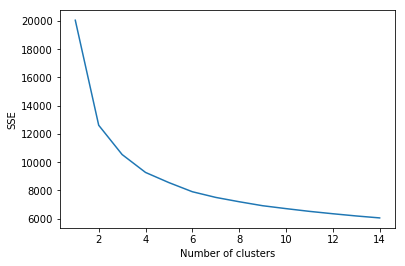

In [159]:
# for the whole dataset
sse = {}
for k in range(1, 15):
    kmeans = cluster.KMeans(n_clusters=k).fit(features[var2])
    features[var2]["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


In [160]:
'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
'''

'\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_samples, silhouette_score\n'

In [161]:
'''
for n_clusters in range(2, 10):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features[var2])
    silhouette_avg = silhouette_score(features[var2], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
'''

'\nfor n_clusters in range(2, 10):\n    # Initialize the clusterer with n_clusters value and a random generator\n    # seed of 10 for reproducibility.\n    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)\n    cluster_labels = clusterer.fit_predict(features[var2])\n    silhouette_avg = silhouette_score(features[var2], cluster_labels)\n    print("For n_clusters =", n_clusters,\n          "The average silhouette_score is :", silhouette_avg)\n'

In [162]:

'''
range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features[var2]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features[var2])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features[var2], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features[var2], cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], features[var2][:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
'''    

'\nrange_n_clusters = [2, 3]\n\nfor n_clusters in range_n_clusters:\n    # Create a subplot with 1 row and 2 columns\n    fig, (ax1, ax2) = plt.subplots(1, 2)\n    fig.set_size_inches(18, 7)\n\n    # The 1st subplot is the silhouette plot\n    # The silhouette coefficient can range from -1, 1 but in this example all\n    # lie within [-0.1, 1]\n    ax1.set_xlim([-0.1, 1])\n    # The (n_clusters+1)*10 is for inserting blank space between silhouette\n    # plots of individual clusters, to demarcate them clearly.\n    ax1.set_ylim([0, len(features[var2]) + (n_clusters + 1) * 10])\n\n    # Initialize the clusterer with n_clusters value and a random generator\n    # seed of 10 for reproducibility.\n    clusterer = KMeans(n_clusters=n_clusters, random_state=10)\n    cluster_labels = clusterer.fit_predict(features[var2])\n\n    # The silhouette_score gives the average value for all the samples.\n    # This gives a perspective into the density and separation of the formed\n    # clusters\n    

## Optimal number of clusters might be 8

In [70]:
km = cluster.KMeans(n_clusters=8, max_iter=1000)
np.random.seed(1234)
kcls = km.fit(features[var2])
kcls.labels_

array([1, 1, 3, ..., 1, 1, 5], dtype=int32)

In [71]:
features[var2].groupby(kcls.labels_)\
        .size()

0     7368
1    17530
2     7457
3     4717
4    18034
5     9119
6    12380
7     3564
dtype: int64

In [72]:
features[var2].groupby(kcls.labels_)\
        .mean()\
        .T

,0,1,2,3,4,5,6,7
Children_PC,0.184996,0.193576,0.248494,0.229711,0.186043,0.201130,0.215303,0.177464
Middle_Aged_PC,0.211094,0.212950,0.180546,0.168329,0.218865,0.188023,0.199672,0.221194
Retired_PC,0.163343,0.163669,0.116663,0.146679,0.166766,0.170661,0.147554,0.115852
Young_Persons_PC,0.201718,0.192063,0.228490,0.214694,0.171468,0.210011,0.212623,0.291846
Older_adults_PC,0.238849,0.237742,0.225806,0.240374,0.256858,0.230174,0.224848,0.193365
UK_ROI_born_PC,0.897514,0.960366,0.962770,0.942823,0.957633,0.945783,0.961025,0.705453
Europe_PC,0.036639,0.014452,0.007925,0.011831,0.014686,0.014150,0.011313,0.085132
ROW_PC,0.065847,0.025183,0.029304,0.045346,0.027681,0.040067,0.027662,0.209415
Unempl_PC,0.046704,0.063073,0.112462,0.056510,0.039390,0.062995,0.097281,0.086590
Students_PC,0.045004,0.032854,0.018487,0.006536,0.037449,0.023157,0.030366,0.088178


In [167]:
tidy6 = features[var2].stack()\
                  .reset_index()\
                  .rename(columns={'level_0': 'oid',
                                   'level_1': 'var',
                                   0: 'value'})\
                  .join(pd.Series(kcls.labels_,
                                  name='cl_lab'),
                        on='oid')
tidy6.head()

,oid,var,value,cl_lab
0,0,Children_PC,0.267211,1
1,0,Middle_Aged_PC,0.117169,1
2,0,Retired_PC,0.108921,1
3,0,Young_Persons_PC,0.220547,1
4,0,Older_adults_PC,0.286151,1


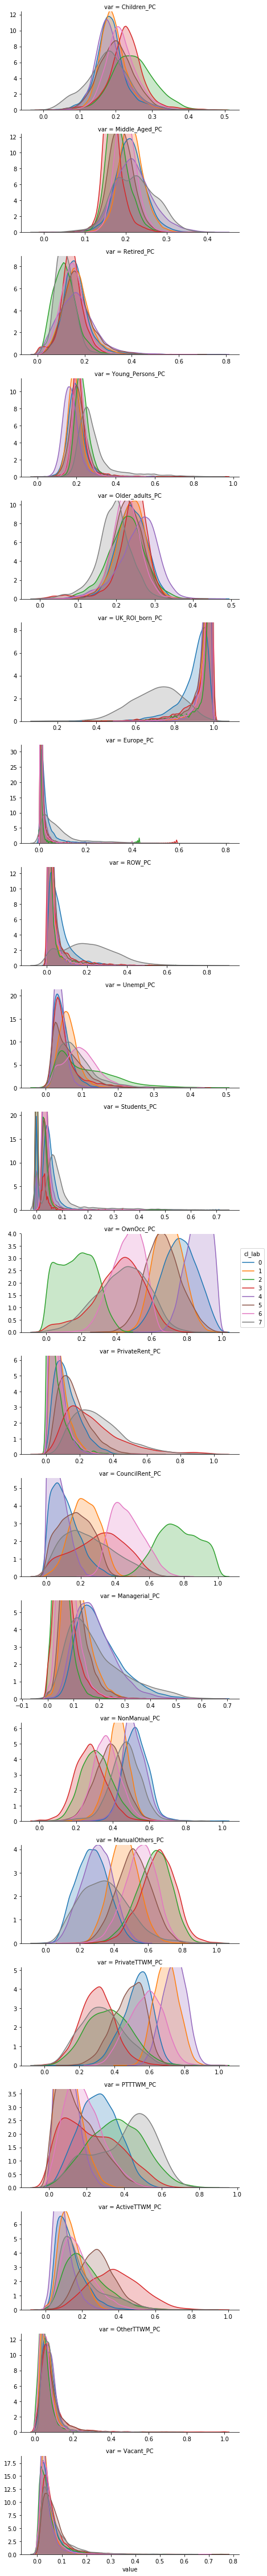

In [168]:
g = sns.FacetGrid(row='var', hue='cl_lab', data=tidy6,
                  sharey=False, sharex=False, aspect=2)
g.map(sns.kdeplot, 'value', shade=True).add_legend();

In [74]:
# Assign the cluster number to our dataset
features['clusters'] = kcls.labels_

In [75]:
features['clusters'].unique()

array([1, 3, 2, 6, 5, 4, 0, 7])

In [76]:
# rename clusters???
features['clusters'] = features['clusters'].replace({0: 'Affluent',\
                                                    1: 'Mixed workers suburban',\
                                                    2: 'Families in council rent',\
                                                    3: 'Blue collar families',\
                                                    4: 'Thriving suburban',\
                                                    5: 'Older striving',\
                                                    6: 'Struggling',\
                                                    7: 'Multicultural urban'})


In [92]:
features.head()

,grid_ID,GRIDCODE,East,North,geometry,Region,Children_PC,Middle_Aged_PC,Retired_PC,Young_Persons_PC,...,PrivateTTWM_PC,PTTTWM_PC,ActiveTTWM_PC,OtherTTWM_PC,Vacant_PC,clusters,id,year,yearv2,yearv3
0,87246_1971,87246,445500.0,1175500.0,"POLYGON ((446000 1175000, 445000 1175000, 4450...",Scotland,0.267211,0.117169,0.108921,0.220547,...,0.805650,0.0,0.194350,0.000000,0.263718,Mixed workers suburban,87246,1971,1971-01-01,1971
1,92136_1971,92136,435500.0,1168500.0,"POLYGON ((436000 1168000, 435000 1168000, 4350...",Scotland,0.198925,0.118280,0.145161,0.247312,...,0.750000,0.0,0.000000,0.250000,0.017544,Mixed workers suburban,92136,1971,1971-01-01,1971
2,94248_1971,94248,447500.0,1165500.0,"POLYGON ((448000 1165000, 447000 1165000, 4470...",Scotland,0.233548,0.191279,0.256054,0.102122,...,0.242486,0.0,0.292479,0.465035,0.000000,Blue collar families,94248,1971,1971-01-01,1971
3,105439_1971,105439,438500.0,1149500.0,"POLYGON ((439000 1149000, 438000 1149000, 4380...",Scotland,0.204070,0.136245,0.164930,0.237252,...,0.511053,0.0,0.000000,0.488947,0.080303,Blue collar families,105439,1971,1971-01-01,1971
4,110347_1971,110347,446500.0,1142500.0,"POLYGON ((447000 1142000, 446000 1142000, 4460...",Scotland,0.264348,0.171982,0.121485,0.189844,...,0.122428,0.0,0.877564,0.000008,0.030988,Families in council rent,110347,1971,1971-01-01,1971


In [76]:
### sum(features['clusters'].isna())

In [77]:
### cl= merged.join(features.loc[:, ['clusters']])

In [78]:
features = features.join(features['grid_ID'].str.split('_', 1, expand=True).rename(columns={0:'id', 1:'year'}))

In [91]:
features.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80169 entries, 0 to 80168
Data columns (total 32 columns):
grid_ID             80169 non-null object
GRIDCODE            80169 non-null object
East                80169 non-null float64
North               80169 non-null float64
geometry            80169 non-null object
Region              80169 non-null object
Children_PC         80169 non-null float64
Middle_Aged_PC      80169 non-null float64
Retired_PC          80169 non-null float64
Young_Persons_PC    80169 non-null float64
Older_adults_PC     80169 non-null float64
UK_ROI_born_PC      80169 non-null float64
Europe_PC           80169 non-null float64
ROW_PC              80169 non-null float64
Unempl_PC           80169 non-null float64
Students_PC         80169 non-null float64
OwnOcc_PC           80169 non-null float64
PrivateRent_PC      80169 non-null float64
CouncilRent_PC      80169 non-null float64
Managerial_PC       80169 non-null float64
NonManual_PC        80169 n

In [81]:
features['yearv2'] =  pd.to_datetime(features['year'],
                              format='%Y')

In [90]:
features['yearv3'] = pd.DatetimeIndex(features['yearv2'] ).year

In [94]:
features.drop(['yearv2'], axis=1)

,grid_ID,GRIDCODE,East,North,geometry,Region,Children_PC,Middle_Aged_PC,Retired_PC,Young_Persons_PC,...,ManualOthers_PC,PrivateTTWM_PC,PTTTWM_PC,ActiveTTWM_PC,OtherTTWM_PC,Vacant_PC,clusters,id,year,yearv3
0,87246_1971,87246,445500.0,1175500.0,"POLYGON ((446000 1175000, 445000 1175000, 4450...",Scotland,0.267211,0.117169,0.108921,0.220547,...,0.801194,0.805650,0.000000,0.194350,0.000000,0.263718,Mixed workers suburban,87246,1971,1971
1,92136_1971,92136,435500.0,1168500.0,"POLYGON ((436000 1168000, 435000 1168000, 4350...",Scotland,0.198925,0.118280,0.145161,0.247312,...,0.800000,0.750000,0.000000,0.000000,0.250000,0.017544,Mixed workers suburban,92136,1971,1971
2,94248_1971,94248,447500.0,1165500.0,"POLYGON ((448000 1165000, 447000 1165000, 4470...",Scotland,0.233548,0.191279,0.256054,0.102122,...,0.862640,0.242486,0.000000,0.292479,0.465035,0.000000,Blue collar families,94248,1971,1971
3,105439_1971,105439,438500.0,1149500.0,"POLYGON ((439000 1149000, 438000 1149000, 4380...",Scotland,0.204070,0.136245,0.164930,0.237252,...,0.924580,0.511053,0.000000,0.000000,0.488947,0.080303,Blue collar families,105439,1971,1971
4,110347_1971,110347,446500.0,1142500.0,"POLYGON ((447000 1142000, 446000 1142000, 4460...",Scotland,0.264348,0.171982,0.121485,0.189844,...,0.717264,0.122428,0.000000,0.877564,0.000008,0.030988,Families in council rent,110347,1971,1971
5,111047_1971,111047,446500.0,1141500.0,"POLYGON ((447000 1141000, 446000 1141000, 4460...",Scotland,0.253264,0.192100,0.111312,0.180032,...,0.521863,0.266358,0.000000,0.722293,0.011349,0.027129,Families in council rent,111047,1971,1971
6,111048_1971,111048,447500.0,1141500.0,"POLYGON ((448000 1141000, 447000 1141000, 4470...",Scotland,0.239057,0.187851,0.154327,0.180922,...,0.463955,0.220339,0.000000,0.702150,0.077511,0.032054,Blue collar families,111048,1971,1971
7,111746_1971,111746,445500.0,1140500.0,"POLYGON ((446000 1140000, 445000 1140000, 4450...",Scotland,0.332095,0.178727,0.064843,0.222152,...,0.519000,0.387621,0.000000,0.570034,0.042345,0.035229,Blue collar families,111746,1971,1971
8,111747_1971,111747,446500.0,1140500.0,"POLYGON ((447000 1140000, 446000 1140000, 4460...",Scotland,0.249747,0.179839,0.064007,0.225721,...,0.488590,0.250222,0.000000,0.745162,0.004616,0.015470,Families in council rent,111747,1971,1971
9,111750_1971,111750,449500.0,1140500.0,"POLYGON ((450000 1140000, 449000 1140000, 4490...",Scotland,0.227226,0.148765,0.203510,0.174384,...,0.579960,0.277992,0.009550,0.439054,0.273404,0.106672,Blue collar families,111750,1971,1971


## The following lines just have some checking of grids